## Step 1: Importing all the necessary libraries



In [1]:
#Install Keras tuner for hyperparameter tuning
!pip install keras_tuner

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plots
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px
import random
import keras_tuner as kt
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


##Step 2 : Use Kaggle API to download the dataset from Kaggle directly on to the Colab Platform


Please provide your Kaggle API credentials i.e Kaggle's username and Kaggle's key to directly import the dataset from the Kaggle platform. For testing purpose, given below are the credentials for my test account


In [3]:
#Enter your Kaggle's username on the 'KAGGLE_USERNAME' and Kaggle's key on the 'KAGGLE_KEY'
os.environ['KAGGLE_USERNAME']='XXXXXXXXXXXXXXXXXXXX'  #your kaggle username
os.environ['KAGGLE_KEY']='XXXXXXXXXXXXXXXXXXXXXXXXX' #your kaggle key

In [4]:
# Downloads the Multi Cancer dataset from Kaggle directly to the Colab
! kaggle datasets download -d obulisainaren/multi-cancer

100% 8.61G/8.62G [08:00<00:00, 21.0MB/s]
100% 8.62G/8.62G [08:00<00:00, 19.3MB/s]


In [ ]:
#unzip the multi cancer dataset folder
! unzip multi-cancer.zip

##Step 3 : Distribution of the data & Splitting the data into training and testing sets

In [6]:
#counts the total number of images in the normal kidney folder
total_normal_kidney_files = len(os.listdir("Multi Cancer/Multi Cancer/Kidney Cancer/kidney_normal/"))
#counts the total number of images in the tumor kidney folder
total_tumor_kidney_files= len(os.listdir("Multi Cancer/Multi Cancer/Kidney Cancer/kidney_tumor/"))

In [7]:
#bar graph shows the distribution of data for the total number of files present in the dataset
bar_graph = px.bar(x=['Normal Kidney', 'Tumor Kidney'], y=[total_normal_kidney_files, total_tumor_kidney_files],labels={'x': 'Types', 'y': 'Total images'},
title='Bar graph for total number of files present in the dataset'
)
bar_graph.update_traces(marker_color=['rgb(255, 255, 0)', 'rgb(204, 0, 0)'])

bar_graph.show()

Since the dataset initially is not splitted into training,testing and validation sets, our initial goal is to split the structure of the dataset

In [8]:
#Below code splits the total number of normal kidney and tumor kidney files into 80:20 ratio for training set and testing set
train_normal_kidney = int(0.8*total_normal_kidney_files)     # 80% for training set in normal kidney class
train_tumor_kidney= int(0.8*total_tumor_kidney_files)        # 80% for training set in tumor kidney class
test_normal_kidney=int(0.2*total_normal_kidney_files)        # 20% for testing set in normal kidney class
test_tumor_kidney=int(0.2*total_tumor_kidney_files)          # 20% for testing set in tumor kidney class

In [9]:
#bar graph shows the distribution of data in different sets i.e training_normal, training_tumor, testing_normal and testing_tumor
bar_graph_train_test = px.bar(x=['Training set- Normal Kidney','Training set- Tumor Kidney','Testing set- Normal Kidney','Testing set- Tumor Kidney'], y=[train_normal_kidney, train_tumor_kidney,test_normal_kidney,test_tumor_kidney],labels={'x': 'Training & Testing Sets', 'y': 'Total images'},
title='Bar graph for total number of files present in each training and testing dataset'
)
bar_graph_train_test.update_traces(marker_color=['rgb(204, 0, 0)', 'rgb(204, 0, 0)'])
bar_graph_train_test.show()

In [10]:
# The below code creates a parent directory called "Kidney Cancer" followed by creating sub directories named 'Train' and 'Test'. Each 'Train' and 'Test' folder then contains two child sub directories called 'kidney_normal' and 'kidney_tumor'

parentDir = "Kidney Cancer"
subDirs = ["Train", "Test"]
childDirs = ["kidney_normal", "kidney_tumor"]

# Below code creates a parent directory called "Kidney Cancer"
if not os.path.exists(parentDir):
    os.mkdir(parentDir)

# Below code creates the subdirectories named Train and Test
for sub in subDirs:
    subPath = os.path.join(parentDir, sub)
    if not os.path.exists(subPath):
        os.mkdir(subPath)

# Below code creates two child sub directories named kidney_normal and kidney_tumor within each subdirectory- Train and Test
    for child in childDirs:
        child_path = os.path.join(subPath, child)
        if not os.path.exists(child_path):
            os.mkdir(child_path)

train_dir = os.path.join(parentDir,'Train')
test_dir = os.path.join(parentDir,'Test')
train_normal_dir = os.path.join(train_dir,'kidney_normal')
train_tumor_dir = os.path.join(train_dir,'kidney_tumor')



In [11]:
#save images from old directory to the newly created parent directory in a splitted manner
for dirName in childDirs:
  for increment in range(1,train_normal_kidney+1):
    imageNum = f"{increment:04}"
    img = Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")
    image = img.save(train_dir+"/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")


for dirName in childDirs:
  for increment in range(4001,total_normal_kidney_files+1):
    img2 =Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")
    image = img2.save(test_dir+"/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")

In [12]:
#list few names of the files from the training dataset for each of the classes
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_tumor_names = os.listdir(train_tumor_dir)
print(train_tumor_names[:10])

['kidney_normal_3633.jpg', 'kidney_normal_1389.jpg', 'kidney_normal_3157.jpg', 'kidney_normal_0572.jpg', 'kidney_normal_0892.jpg', 'kidney_normal_2509.jpg', 'kidney_normal_3192.jpg', 'kidney_normal_3309.jpg', 'kidney_normal_3170.jpg', 'kidney_normal_1756.jpg']
['kidney_tumor_1736.jpg', 'kidney_tumor_3893.jpg', 'kidney_tumor_3894.jpg', 'kidney_tumor_1532.jpg', 'kidney_tumor_1997.jpg', 'kidney_tumor_3562.jpg', 'kidney_tumor_3197.jpg', 'kidney_tumor_2206.jpg', 'kidney_tumor_1339.jpg', 'kidney_tumor_2841.jpg']


## Step 4 : Data Visualization

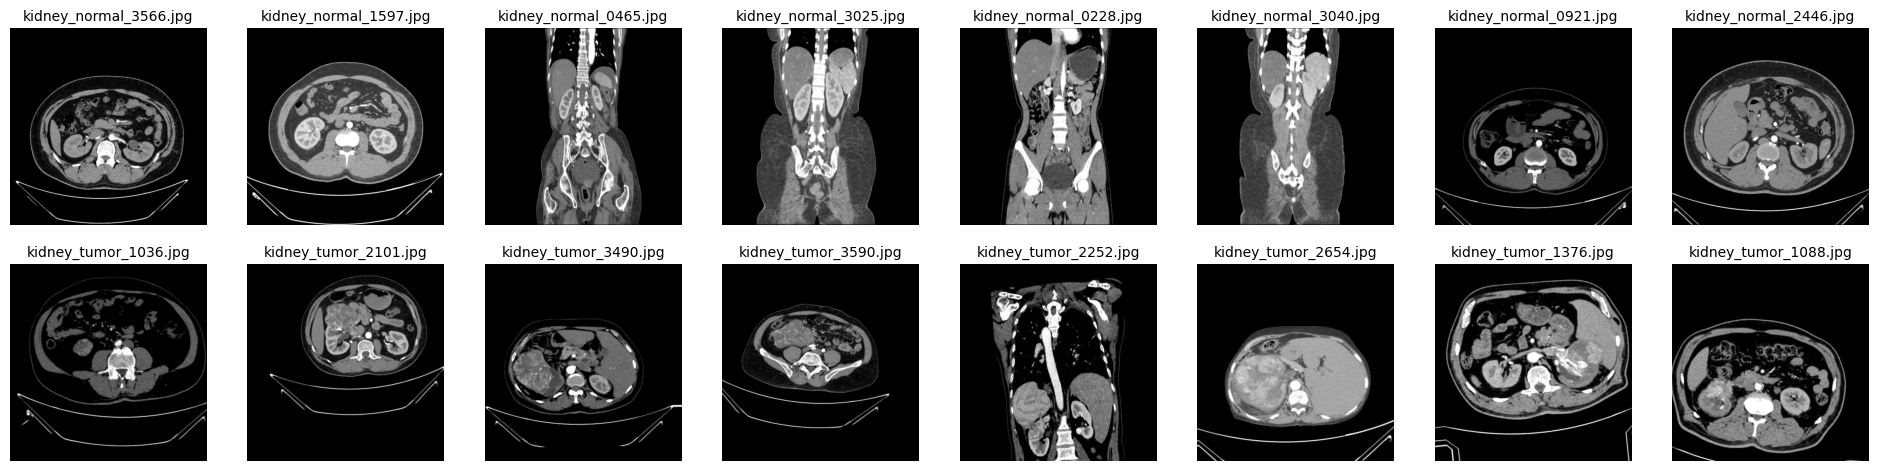

In [ ]:
plots.figure(figsize=(24,24))

random_images = 8

# Select random images from train normal kidney directory
normal_pic = random.sample(train_normal_names, random_images)
normal_kidney_pic = [os.path.join(train_normal_dir, pic) for pic in normal_pic]

# Select random images from train tumor kidney directory
tumor_pic = random.sample(train_tumor_names, random_images)
tumor_kidney_pic = [os.path.join(train_tumor_dir, pic) for pic in tumor_pic]

# Merge the selected images into total_images list
total_images = normal_kidney_pic + tumor_kidney_pic

for images in range(0,len(total_images)):
  data = total_images[images].split('/',3)[3]
  plot = plots.subplot(8,8,images+1)
  plot.axis('Off')
  image = mpimg.imread(total_images[images])
  plot.set_title(data,fontsize=10)
  plots.imshow(image)

plots.show()

## STEP- 5: Splitting the test dataset into 80:20 ratio for Normal and Tumor images - Adding normal images from new Kaggle's dataset into the testing set

In [13]:
#remove the Multi Canc Parent directory
!rm -r "/content/Multi Cancer"

In [14]:
# download the dataset from kaggle
! kaggle datasets download -d anima890/kidney-ct-scan

100% 1.51G/1.52G [01:27<00:00, 20.1MB/s]
100% 1.52G/1.52G [01:27<00:00, 18.6MB/s]


In [ ]:
#unzip the zip file
!unzip kidney-ct-scan.zip

In [27]:
#calculate the total number of files in the new normal directory
new_normal_files = len(os.listdir("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal"))
print(new_normal_files)

5077


## STEP- 6 : Adding images to the test normal class to make it to 1600

Since in reality there will be more normal and healthy patients and less kidney tumors, we need to split the testing set classes normal and tumor in the ratio 80:20- normal (1600) and tumor (400)

In [28]:
# adding 600 images to the testing set in order to get normal : tumor ratio as 80:20
sum_normal_files=0
for decrement in range(new_normal_files,0,-1):
  img2 =Image.open("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- ("+str(decrement)+")"+".jpg")
  image = img2.save("/content/Kidney Cancer/Test/kidney_normal/kidney_normal"+str(decrement)+".jpg")
  sum_normal_files+=1
  if sum_normal_files==600:
    break

In [29]:
test_tumor_dir=os.path.join(test_dir,'kidney_tumor')
test_tumor_names = os.listdir(test_tumor_dir)

In [30]:
#remove the extra images from the tumor testing set to maintain a ratio of 80:20 for normal:tumor
sum_tumor_files=0
for decrement in range(5000,0,-1):
  os.remove("/content/Kidney Cancer/Test/kidney_tumor/kidney_tumor_"+str(decrement)+".jpg")
  sum_tumor_files+=1
  if sum_tumor_files==600:
    break

## Step 7 : Data Augmentation and Generators for Training, Testing, and Validation

In [31]:
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.5,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

validDatagen=ImageDataGenerator(rescale=1./255)

testDatagen=ImageDataGenerator(rescale=1./255)

train_generator= trainDatagen.flow_from_directory(train_dir,
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   subset='training')
validation_generator= trainDatagen.flow_from_directory(train_dir,
                                                       class_mode='binary',
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       subset='validation')
test_generator=testDatagen.flow_from_directory(test_dir,
                                                class_mode='binary',
                                                batch_size=32,
                                                target_size=(224,224))

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [32]:
train_generator.class_indices

{'kidney_normal': 0, 'kidney_tumor': 1}

## STEP 8 : Building Model without Hyperparameter tuning - MODEL 1

In [ ]:
# Create a Sequential model
model = Sequential()

# Convolutional Layer 1: 32 filters, each of size (3, 3), ReLU activation
# Input shape: (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
# MaxPooling Layer 1: Pooling window size (4, 4)
model.add(MaxPooling2D(pool_size=(4, 4)))
# Convolutional Layer 2: 32 filters, each of size (3, 3), ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
# MaxPooling Layer 2: Pooling window size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional Layer 3: 64 filters, each of size (3, 3), ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling Layer 3: Pooling window size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional Layer 4: 64 filters, each of size (3, 3), ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling Layer 4: Pooling window size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout Layer: Helps prevent overfitting by randomly deactivating 15% of neurons
model.add(Dropout(0.15))
# Convolutional Layer 5: 128 filters, each of size (3, 3), ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
# MaxPooling Layer 5: Pooling window size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output to prepare for fully connected layers
model.add(Flatten())
# Fully Connected Layer 1: 256 units, ReLU activation
model.add(Dense(units=256, activation='relu'))
# Dropout Layer: Helps prevent overfitting by randomly deactivating 30% of neurons
model.add(Dropout(0.3))
# Fully Connected Layer 2: 128 units, ReLU activation
model.add(Dense(units=128, activation='relu'))
# Fully Connected Layer 3: 64 units, ReLU activation
model.add(Dense(units=64, activation='relu'))
# Output Layer: Binary classification with a sigmoid activation function
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

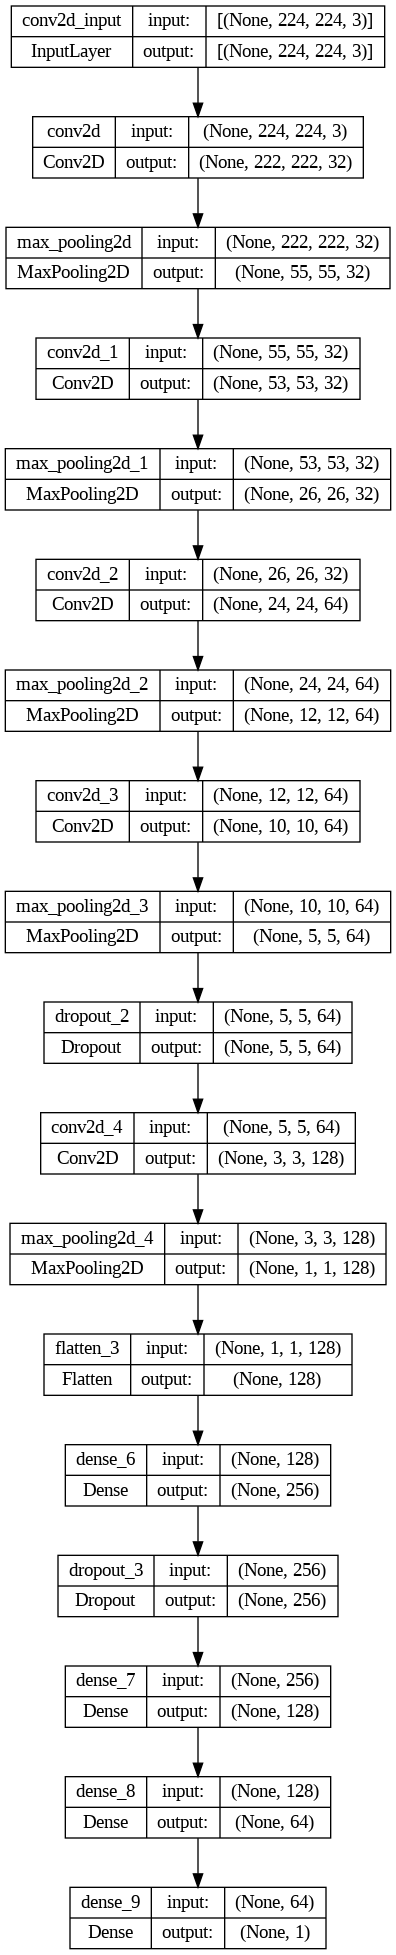

In [ ]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train the model on the provided training data generator
# for a specified number of epochs
# Validate the model's performance using the validation data generator.
# Optionally, you can include callbacks for monitoring and early stopping.
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator,
                    callbacks=[early_stopping]
                    )

Epoch 1/100
200/200 [==============================] - 119s 556ms/step - loss: 0.6335 - accuracy: 0.6361 - val_loss: 0.4903 - val_accuracy: 0.8100
Epoch 2/100
200/200 [==============================] - 134s 669ms/step - loss: 0.5302 - accuracy: 0.7495 - val_loss: 0.3840 - val_accuracy: 0.8506
Epoch 3/100
200/200 [==============================] - 115s 576ms/step - loss: 0.4486 - accuracy: 0.7973 - val_loss: 0.2986 - val_accuracy: 0.8906
Epoch 4/100
200/200 [==============================] - 113s 566ms/step - loss: 0.3738 - accuracy: 0.8350 - val_loss: 0.2387 - val_accuracy: 0.9038
Epoch 5/100
200/200 [==============================] - 130s 651ms/step - loss: 0.3141 - accuracy: 0.8662 - val_loss: 0.2180 - val_accuracy: 0.9137
Epoch 6/100
200/200 [==============================] - 112s 558ms/step - loss: 0.2525 - accuracy: 0.8950 - val_loss: 0.1981 - val_accuracy: 0.9175
Epoch 7/100
200/200 [==============================] - 113s 563ms/step - loss: 0.2146 - accuracy: 0.9109 - val_loss: 0

In [19]:
#generate training vs validation loss curve
def lossCurve(ht):
  plots.plot(ht.history['loss'])
  plots.plot(ht.history['val_loss'])
  plots.legend(['training','validation'])
  plots.title('Training and validation loss')
  plots.xlabel('epoch')


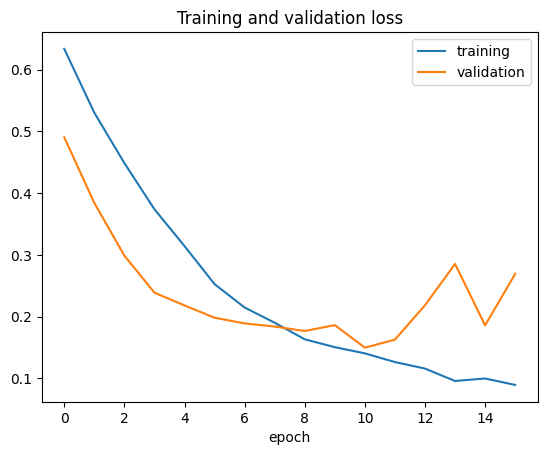

In [ ]:
lossCurve(history)


In [18]:
#generate training vs validation accuracy curve
def accuracyCurve(ht):
  plots.plot(ht.history['accuracy'])
  plots.plot(ht.history['val_accuracy'])
  plots.legend(['training','validation'])
  plots.title('Training and validation accuracy')
  plots.xlabel('epoch')

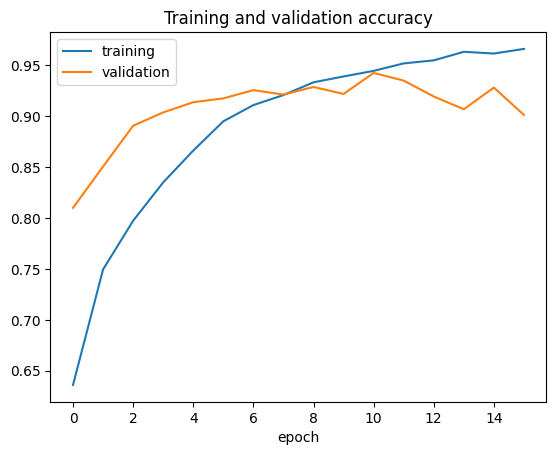

In [ ]:
accuracyCurve(history)

In [20]:
# Evaluate the final model on the test set
def evaluate_model(model):
  test_loss, test_acc = model.evaluate(test_generator)
  print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
evaluate_model(model)

63/63 [==============================] - 6s 96ms/step - loss: 0.1644 - accuracy: 0.9275
Test accuracy: 0.9275000095367432, Test loss: 0.16443511843681335


In [2]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def getPrediction(trained_model):
# Initialize empty lists to store predicted and true labels
  y_test = []
  y_actual = []

  # Directory paths for normal and tumor images
  normal_dir = "/content/Kidney Cancer/Test/kidney_normal/"
  tumor_dir = "/content/Kidney Cancer/Test/kidney_tumor/"
  # Define a function to load and preprocess images
  def load_and_preprocess_image(img_path):
      img = load_img(img_path, target_size=(224, 224))
      img = img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img /= 255.0
      return img


  # Iterate through normal images
  for i in os.listdir(normal_dir):
      img_path = os.path.join(normal_dir, i)
      img = load_and_preprocess_image(img_path)
      p = trained_model.predict(img)
      predicted_class = 1 if p[0, 0] > 0.5 else 0
      y_test.append(predicted_class)
      y_actual.append(0)  # 0 for normal class

  # Iterate through tumor images
  for i in os.listdir(tumor_dir):
      img_path = os.path.join(tumor_dir, i)
      img = load_and_preprocess_image(img_path)
      p = trained_model.predict(img)
      predicted_class = 1 if p[0, 0] > 0.5 else 0
      y_test.append(predicted_class)
      y_actual.append(1) #1 for tumor class

  y_actual = np.array(y_actual)
  y_test = np.array(y_test)
  cm = confusion_matrix(y_actual,y_test)

  #print(metrics.classification_report(y_actual,y_test))

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tumor"], yticklabels=["Normal", "Tumor"])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

# Print the classification report
  class_report = classification_report(y_actual, y_test, target_names=["Normal", "Tumor"])
  print("\n")
  print(class_report)



####The confusion matrix and classification report is present down below the output shown on getPrediction(). Please scroll to the bottom in the below cell.

1/1 [==============================] - 0s 30ms/step


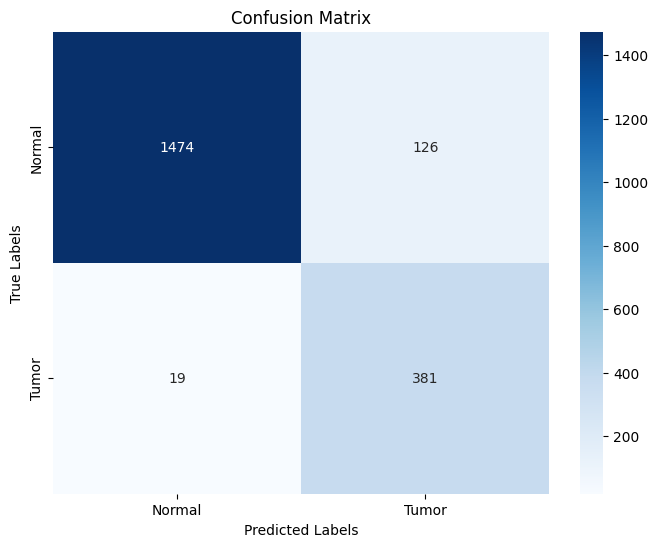



              precision    recall  f1-score   support

      Normal       0.99      0.92      0.95      1600
       Tumor       0.75      0.95      0.84       400

    accuracy                           0.93      2000
   macro avg       0.87      0.94      0.90      2000
weighted avg       0.94      0.93      0.93      2000



In [ ]:
getPrediction(model)

In [ ]:
#save the model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



##  STEP - 9:  CNN Model with hyperparameter tuning - MODEL 2

In [33]:
#create a CNN model architecture with hyperparameter tuning

def model_build_hp(hp):
    modelHp = Sequential()
    # Tune the number of filters in the first convolutional layer
    filters1_hp = hp.Int('filters1', min_value=16, max_value=64, step=16)
    # Tune the dropout rate
    dropout1_hp = hp.Float('dropout1', min_value=0.2, max_value=0.3, step=0.1)

    modelHp.add(Conv2D(filters1_hp, (3, 3), activation="relu", input_shape=(224, 224, 3)))
    modelHp.add(MaxPooling2D())
    modelHp.add(Dropout(dropout1_hp))

    # Add more Convolutional layers
    modelHp.add(Conv2D(filters1_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D())
    modelHp.add(Dropout(dropout1_hp))

    # Tune the number of filters
    filters2_hp = hp.Int('filters2', min_value=64, max_value=256, step=16)
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D())
    modelHp.add(Dropout(dropout1_hp))

    # Add more Convolutional layers
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D())
    modelHp.add(Dropout(dropout1_hp))

    # Add more Convolutional layers
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D())
    modelHp.add(Dropout(dropout1_hp))

    # Flatten the output
    modelHp.add(Flatten())

    # Tune the number of units in the first Dense layer
    units1_hp = hp.Int('units1', min_value=128, max_value=256, step=64)
    modelHp.add(Dense(units=units1_hp, activation='relu'))

    # Output layer for binary classification
    modelHp.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with a variable learning rate
    learning_rate_hp = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    modelHp.compile(optimizer=Adam(learning_rate=learning_rate_hp),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    modelHp.summary()
    return modelHp


In [ ]:
tuner = kt.RandomSearch(
    model_build_hp,
    objective='val_accuracy',  # Tune based on validation accuracy
    max_trials=3,  # Number of combinations to try
    directory='parameterDirs',  # Directory to save results
    project_name='kidney_tumor'  # Project name
)

In [36]:
# Search for the best hyperparameters
tuner.search(train_generator,
             validation_data=validation_generator,
             epochs=50,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
modelHp = tuner.hypermodel.build(best_hps)

# Train the final model
history_hp = modelHp.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=[early_stopping])



Trial 3 Complete [00h 18m 12s]
val_accuracy: 0.9131249785423279

Best val_accuracy So Far: 0.9206249713897705
Total elapsed time: 00h 58m 59s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                       

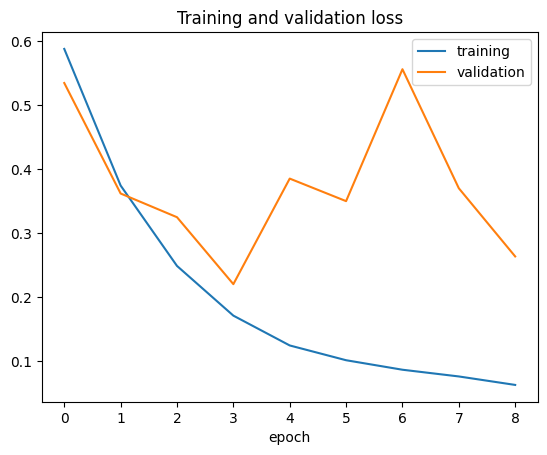

In [37]:
#generate training vs validation loss curve
lossCurve(history_hp)

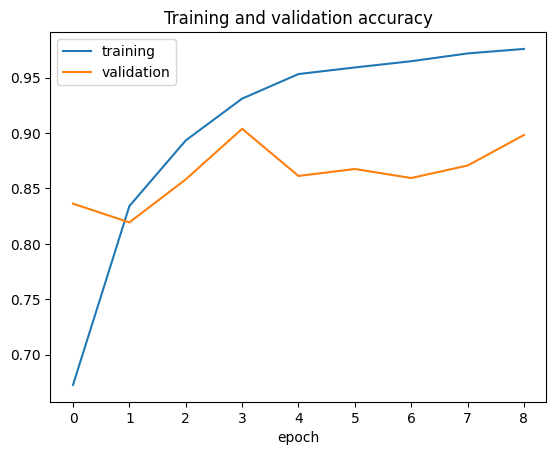

In [38]:
#generate training vs validation accuracy curve
accuracyCurve(history_hp)

In [39]:
# Evaluate the final model on the test set
evaluate_model(modelHp)

63/63 [==============================] - 6s 96ms/step - loss: 0.2863 - accuracy: 0.8840
Test accuracy: 0.8840000033378601, Test loss: 0.28628093004226685


####The confusion matrix and classification report is present down below the output shown on getPrediction(). Please scroll to the bottom in the below cell.

1/1 [==============================] - 0s 38ms/step


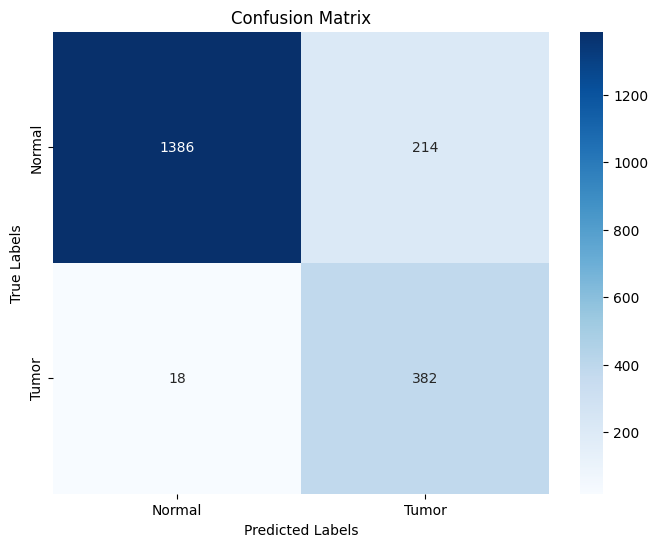



              precision    recall  f1-score   support

      Normal       0.99      0.87      0.92      1600
       Tumor       0.64      0.95      0.77       400

    accuracy                           0.88      2000
   macro avg       0.81      0.91      0.84      2000
weighted avg       0.92      0.88      0.89      2000



In [42]:
# Generate classification report and confusion matrix
getPrediction(modelHp)

## STEP - 10: Implement VGG16 Model - Transfer Learning Approach - MODEL 3

In [ ]:
#Implement the VGG16 Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
output = Dense(1, activation='sigmoid')(x)
# Create the final model
model_vgg = Model(inputs=base_model.input, outputs=output)
# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

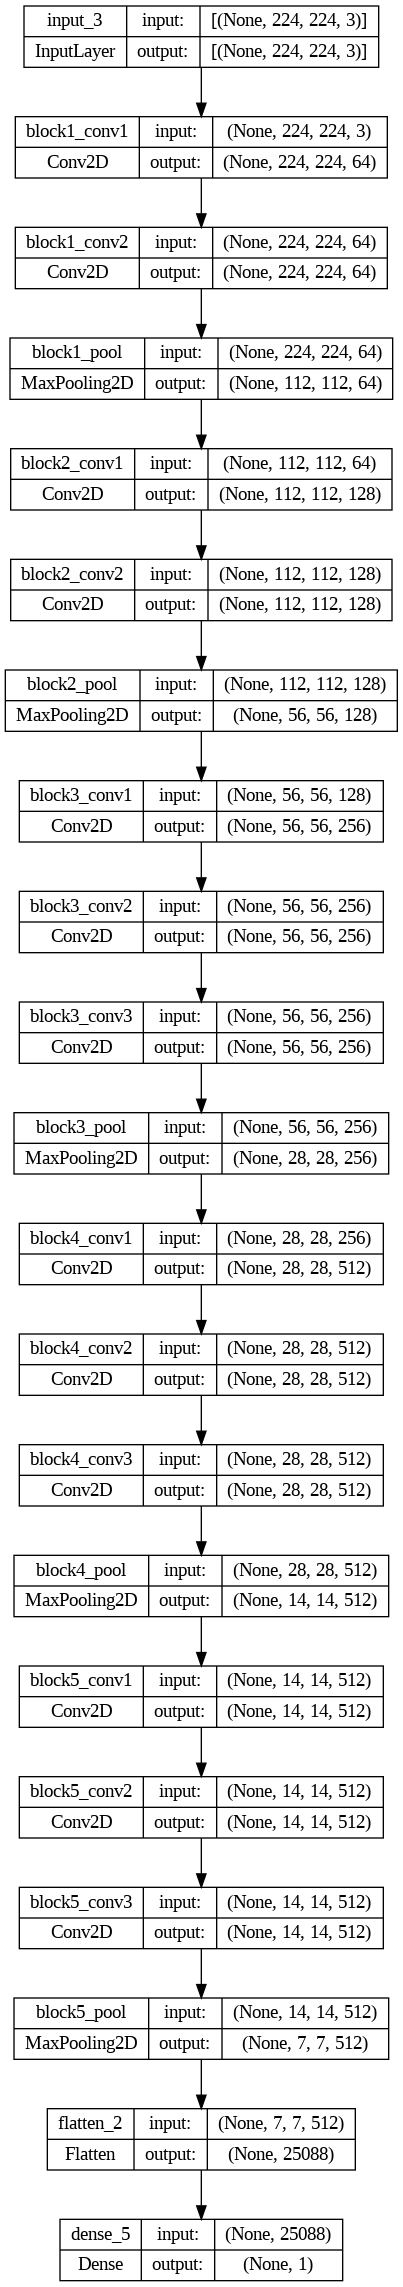

In [ ]:
keras.utils.plot_model(
    model_vgg,
    to_file='modelvgg.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
#train the model
history_vgg = model_vgg.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=[early_stopping])


Epoch 1/50
200/200 [==============================] - 123s 606ms/step - loss: 0.5264 - accuracy: 0.7728 - val_loss: 0.4264 - val_accuracy: 0.8587
Epoch 2/50
200/200 [==============================] - 119s 595ms/step - loss: 0.3603 - accuracy: 0.8970 - val_loss: 0.3295 - val_accuracy: 0.9013
Epoch 3/50
200/200 [==============================] - 119s 597ms/step - loss: 0.2830 - accuracy: 0.9272 - val_loss: 0.2977 - val_accuracy: 0.9125
Epoch 4/50
200/200 [==============================] - 121s 605ms/step - loss: 0.2468 - accuracy: 0.9380 - val_loss: 0.2643 - val_accuracy: 0.9194
Epoch 5/50
200/200 [==============================] - 119s 596ms/step - loss: 0.2123 - accuracy: 0.9483 - val_loss: 0.2340 - val_accuracy: 0.9325
Epoch 6/50
200/200 [==============================] - 118s 590ms/step - loss: 0.1956 - accuracy: 0.9517 - val_loss: 0.2317 - val_accuracy: 0.9275
Epoch 7/50
200/200 [==============================] - 119s 593ms/step - loss: 0.1718 - accuracy: 0.9586 - val_loss: 0.1988 -

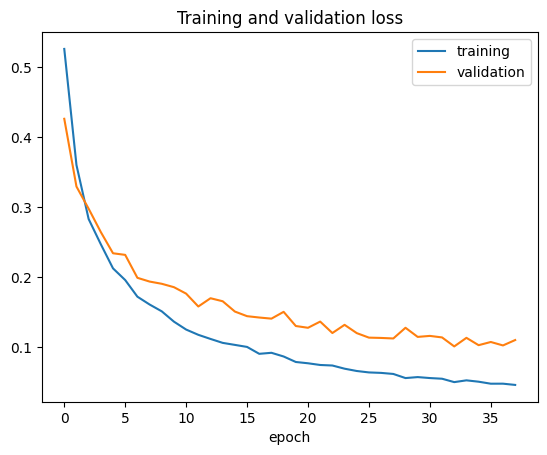

In [ ]:
#generate training vs validation loss curve
lossCurve(history_vgg)

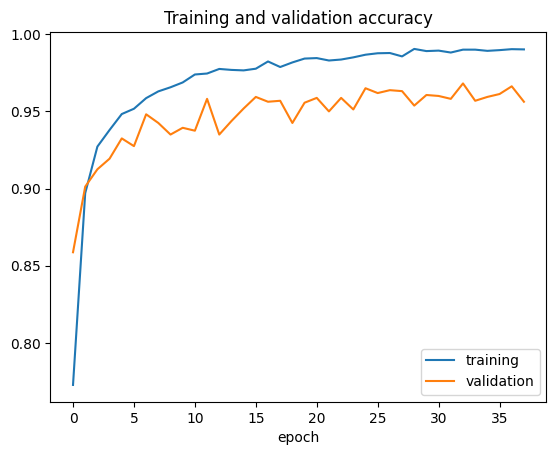

In [ ]:
#generate training vs validation accuracy curve
accuracyCurve(history_vgg)

In [ ]:
# Evaluate the model on the test set
evaluate_model(model_vgg)

63/63 [==============================] - 8s 126ms/step - loss: 0.1885 - accuracy: 0.9485
Test accuracy: 0.9484999775886536, Test loss: 0.18854108452796936


####The confusion matrix and classification report is present down below the output shown on getPrediction(). Please scroll to the bottom in the below cell.

1/1 [==============================] - 0s 23ms/step


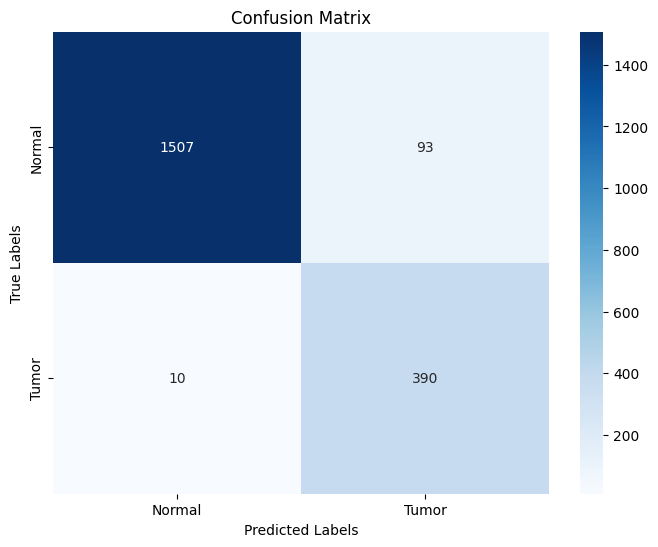



              precision    recall  f1-score   support

      Normal       0.99      0.94      0.97      1600
       Tumor       0.81      0.97      0.88       400

    accuracy                           0.95      2000
   macro avg       0.90      0.96      0.93      2000
weighted avg       0.96      0.95      0.95      2000



In [ ]:
# Generate classification report and confusion matrix
getPrediction(model_vgg)

##STEP - 11 : Save the best model so far

In [44]:
#Considering all the metrics for three models mentioned above , the VGG16 Transfer Learning Model outperforms
#the other two models in terms of accuracy, F1-score, and generalization. It seems to be the best model for our task.
model_vgg.save('model_vgg.h5')